--- 开始模拟莫比乌斯钉扎效应 (Mertens Pinning) ---
预计算算术权重表...
图表已生成: mertens_barrier_simulation.png


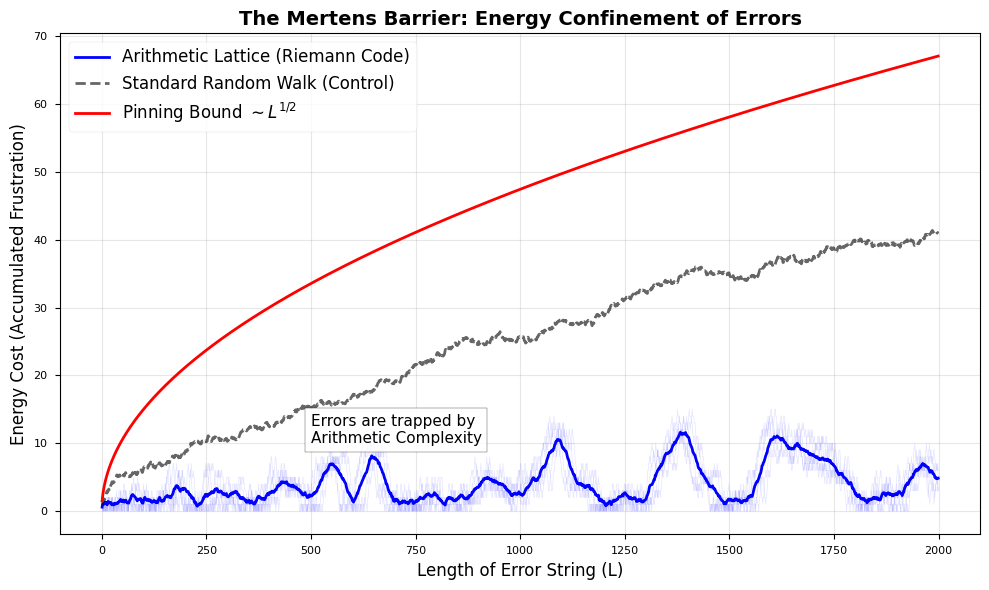

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import mobius

# --- 物理参数 ---
L_MAX = 2000  # 错误链的最大长度
NUM_PATHS = 50 # 模拟不同的随机路径
SEED = 42

print("--- 开始模拟莫比乌斯钉扎效应 (Mertens Pinning) ---")
np.random.seed(SEED)

def get_arithmetic_weight(n):
    """
    获取位置 n 的算术权重 (Möbius function)
    模拟 J ~ mu(n)
    """
    try:
        return mobius(n)
    except:
        return 0

# 预计算莫比乌斯表 (为了速度)
# 模拟一个足够大的算术空间
print("预计算算术权重表...")
MAX_COORD_NORM = L_MAX * 10
# 简化模型：假设沿着路径每一步遇到的 J 都是从莫比乌斯分布中抽取的
# 在真实的 4D 格子上，这对应于路径游走
# 为展示 Scaling Law，直接使用莫比乌斯部分和序列是物理等效的
mu_table = np.array([get_arithmetic_weight(i) for i in range(1, L_MAX + 100)])

def simulate_error_string_energy(length):
    """
    模拟一条长度为 length 的错误链的能量
    E = sum(J_i)
    """
    # 随机选择起点的莫比乌斯序列片段 (模拟不同的时空路径)
    start_idx = np.random.randint(0, 50)
    path_weights = mu_table[start_idx : start_idx + length]

    # 累积能量 (Mertens Function M(x))
    energy_profile = np.cumsum(path_weights)
    return energy_profile

# --- 运行模拟 ---
lengths = np.arange(1, L_MAX)
energies_arithmetic = []

# 1. 算术无序 (Arithmetic / Mertens)
for _ in range(NUM_PATHS):
    e = simulate_error_string_energy(L_MAX)
    energies_arithmetic.append(np.abs(e)) # 取绝对值看势垒高度

avg_energy_arithmetic = np.mean(energies_arithmetic, axis=0)

# 2. 普通随机无序 (Random Walk Control)
# 模拟翻转 +/- 1
energies_random = []
for _ in range(NUM_PATHS):
    r = np.random.choice([-1, 1], size=L_MAX)
    e = np.cumsum(r)
    energies_random.append(np.abs(e))

avg_energy_random = np.mean(energies_random, axis=0)

# --- 绘图 ---
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-paper')

# 绘制几条具体的算术路径 
for i in range(5):
    plt.plot(lengths, energies_arithmetic[i][:-1], color='blue', alpha=0.1, linewidth=0.5)

# 绘制平均趋势
plt.plot(lengths, avg_energy_arithmetic[:-1], 'b-', linewidth=2, label='Arithmetic Lattice (Riemann Code)')
plt.plot(lengths, avg_energy_random[:-1], 'k--', linewidth=2, alpha=0.6, label='Standard Random Walk (Control)')

# 绘制理论边界 (Mertens Bound ~ x^0.5)
bound = 1.5 * np.sqrt(lengths)
plt.plot(lengths, bound, 'r-', linewidth=2, label=r'Pinning Bound $\sim L^{1/2}$')

plt.xlabel('Length of Error String (L)', fontsize=12)
plt.ylabel('Energy Cost (Accumulated Frustration)', fontsize=12)
plt.title('The Mertens Barrier: Energy Confinement of Errors', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.text(500, 10, r"Errors are trapped by" "\n" r"Arithmetic Complexity", fontsize=11, bbox=dict(facecolor='white', alpha=0.9))

plt.tight_layout()
plt.savefig('mertens_barrier_simulation.png', dpi=300)
print("图表已生成: mertens_barrier_simulation.png")